In [1]:
import pandas as pd       
import numpy as np        
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
calories=pd.read_csv("C:\\Users\\telug\\OneDrive\\Desktop\\DS\\Project\\Projects\\Calorie Burnt Prediction\\calories.csv")
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [3]:
exercise=pd.read_csv("C:\\Users\\telug\\OneDrive\\Desktop\\DS\\Project\\Projects\\Calorie Burnt Prediction\\exercise.csv")
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [4]:
calories.isnull().sum()

User_ID     0
Calories    0
dtype: int64

In [5]:
exercise.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

In [6]:
#Merging both the files
df=pd.concat([exercise,calories['Calories']],axis=1)
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [7]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [9]:
df.shape

(15000, 9)

In [10]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


# EDA

In [11]:
#Target variable(Calories)

<function matplotlib.pyplot.show(close=None, block=None)>

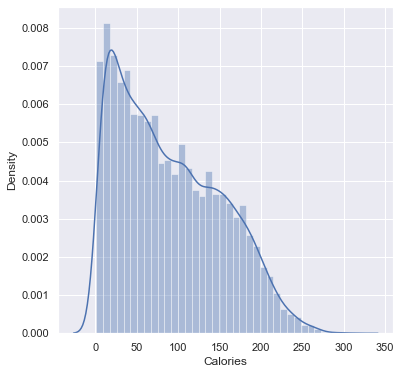

In [12]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['Calories'])
plt.show

<AxesSubplot:>

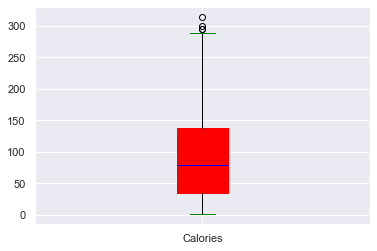

In [13]:
Calories=df['Calories']
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
Calories.plot.box(color=props2,patch_artist=True,vert=True)

In [14]:
def find_boundaries(df,feature):
    Q1=df[feature].quantile(.25)
    Q3=df[feature].quantile(.75)
    IQR=Q3-Q1
    lower_boundary=Q1-1.5*IQR
    upper_boundary=Q3+1.5*IQR
    
    return lower_boundary,upper_boundary

In [15]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [16]:
outliers = find_outliers_IQR(df['Calories'])
print('number of outliers: '+ str(len(outliers)))
(len(outliers))/(len('Calories'))

number of outliers: 4


0.5

In [17]:
lower_Calories,upper_Calories=find_boundaries(df,'Calories')
print(lower_Calories,upper_Calories)

-119.5 292.5


In [18]:
df['Calories']=np.where(df['Calories']>upper_Calories,upper_Calories,
                         np.where(df['Calories']<lower_Calories,lower_Calories,df['Calories']))

<AxesSubplot:>

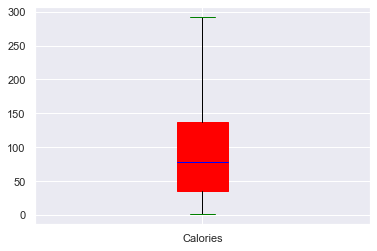

In [19]:
Calories=df['Calories']
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
Calories.plot.box(color=props2,patch_artist=True,vert=True)

In [20]:
#Gender

In [21]:
df['Gender'].value_counts()

female    7553
male      7447
Name: Gender, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

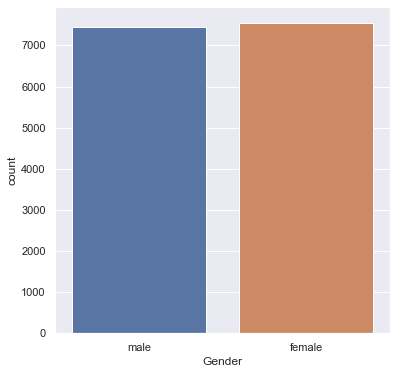

In [22]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(df['Gender'])
plt.show

In [23]:
#Age

<function matplotlib.pyplot.show(close=None, block=None)>

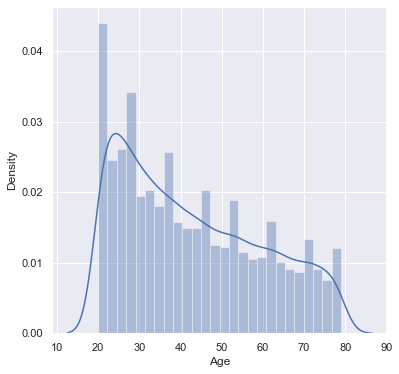

In [24]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['Age'])
plt.show

<AxesSubplot:>

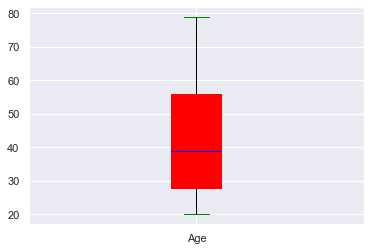

In [25]:
Age=df['Age']
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
Age.plot.box(color=props2,patch_artist=True,vert=True)

In [26]:
#Height

<function matplotlib.pyplot.show(close=None, block=None)>

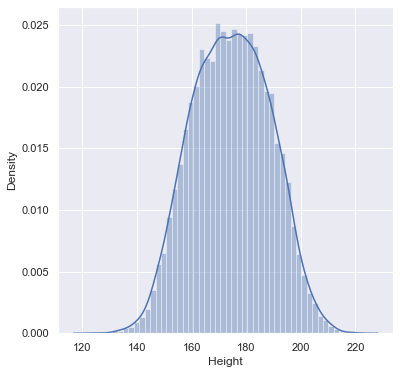

In [27]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['Height'])
plt.show

<AxesSubplot:>

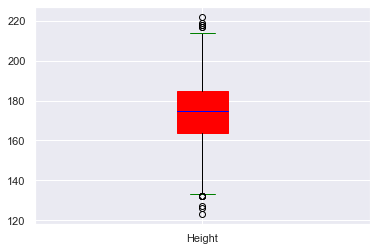

In [28]:
Height=df['Height']
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
Height.plot.box(color=props2,patch_artist=True,vert=True)

In [29]:
outliers = find_outliers_IQR(df['Height'])
print('number of outliers: '+ str(len(outliers)))
(len(outliers))/(len('Height'))

number of outliers: 14


2.3333333333333335

In [30]:
lower_Height,upper_Height=find_boundaries(df,'Height')
print(lower_Height,upper_Height)

132.5 216.5


In [31]:
df['Height']=np.where(df['Height']>upper_Height,upper_Height,
                         np.where(df['Height']<lower_Height,lower_Height,df['Height']))

<AxesSubplot:>

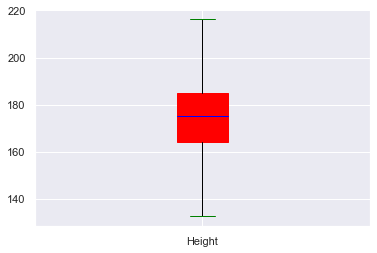

In [32]:
Height=df['Height']
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
Height.plot.box(color=props2,patch_artist=True,vert=True)

In [33]:
#Weight

<function matplotlib.pyplot.show(close=None, block=None)>

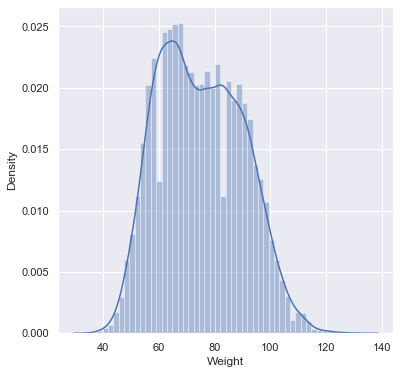

In [34]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['Weight'])
plt.show

<AxesSubplot:>

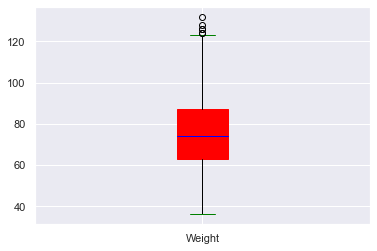

In [35]:
Weight=df['Weight']
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
Weight.plot.box(color=props2,patch_artist=True,vert=True)

In [36]:
outliers = find_outliers_IQR(df['Weight'])
print('number of outliers: '+ str(len(outliers)))
(len(outliers))/(len('Weight'))

number of outliers: 6


1.0

In [37]:
lower_Weight,upper_Weight=find_boundaries(df,'Weight')
print(lower_Weight,upper_Weight)

27.0 123.0


In [38]:
df['Weight']=np.where(df['Weight']>upper_Weight,upper_Weight,
                         np.where(df['Weight']<lower_Weight,lower_Weight,df['Weight']))

<AxesSubplot:>

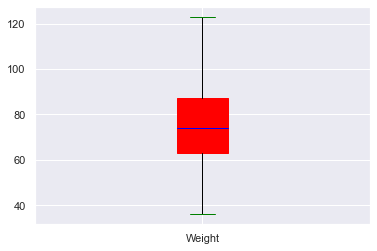

In [39]:
Weight=df['Weight']
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
Weight.plot.box(color=props2,patch_artist=True,vert=True)

In [40]:
#Duration

<function matplotlib.pyplot.show(close=None, block=None)>

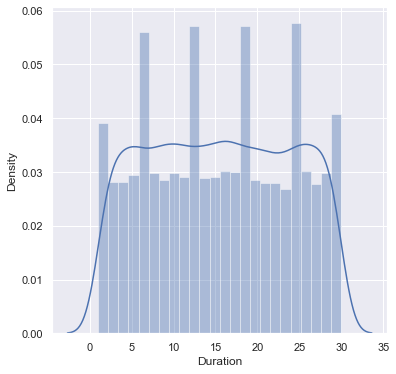

In [41]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['Duration'])
plt.show

<AxesSubplot:>

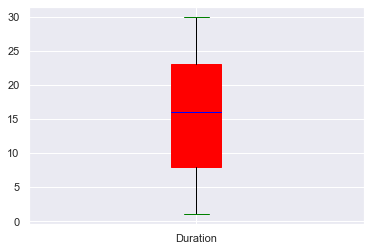

In [42]:
Duration=df['Duration']
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
Duration.plot.box(color=props2,patch_artist=True,vert=True)

In [43]:
#Heart_Rate

<function matplotlib.pyplot.show(close=None, block=None)>

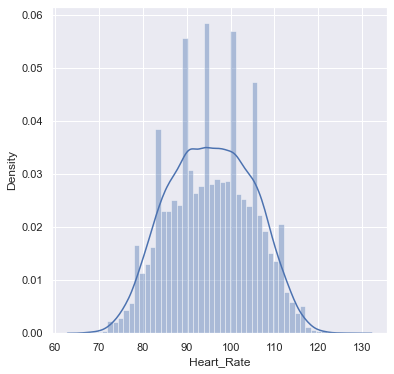

In [44]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['Heart_Rate'])
plt.show

<AxesSubplot:>

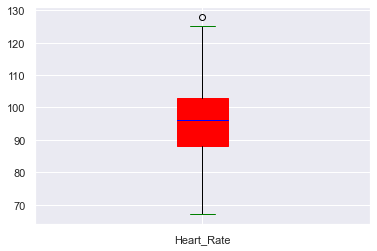

In [45]:
Heart_Rate=df['Heart_Rate']
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
Heart_Rate.plot.box(color=props2,patch_artist=True,vert=True)

In [46]:
#Body_Temp

<function matplotlib.pyplot.show(close=None, block=None)>

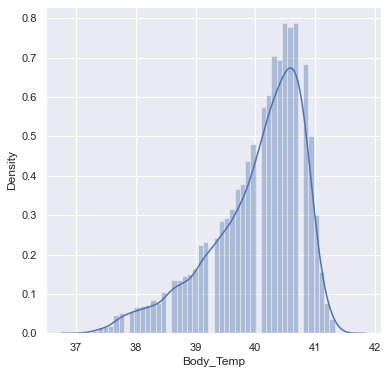

In [47]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['Body_Temp'])
plt.show

<AxesSubplot:>

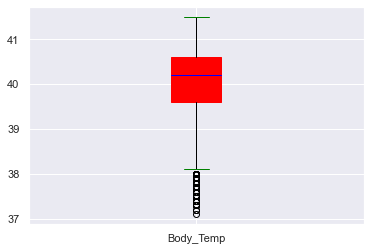

In [48]:
Body_Temp=df['Body_Temp']
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
Body_Temp.plot.box(color=props2,patch_artist=True,vert=True)

In [49]:
outliers = find_outliers_IQR(df['Body_Temp'])
print('number of outliers: '+ str(len(outliers)))
(len(outliers))/(len('Body_Temp'))

number of outliers: 369


41.0

In [50]:
lower_Body_Temp,upper_Body_Temp=find_boundaries(df,'Body_Temp')
print(lower_Body_Temp,upper_Body_Temp)

38.1 42.1


In [51]:
df['Body_Temp']=np.where(df['Body_Temp']>upper_Body_Temp,upper_Body_Temp,
                         np.where(df['Body_Temp']<lower_Body_Temp,lower_Body_Temp,df['Body_Temp']))

<AxesSubplot:>

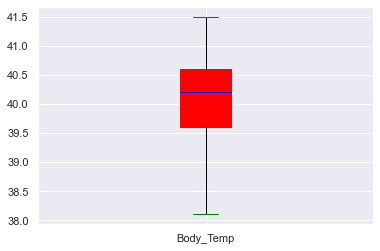

In [52]:
Body_Temp=df['Body_Temp']
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
Body_Temp.plot.box(color=props2,patch_artist=True,vert=True)

In [53]:
#Creating dummies for Gender column
df['Gender']=pd.get_dummies(df.Gender,drop_first=True)

In [54]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


In [55]:
df['Gender'].value_counts()

0    7553
1    7447
Name: Gender, dtype: int64

# Model Building

In [66]:
# will load the libraries for building the model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn import datasets, ensemble

In [57]:
X=df.drop(['Age', 'Height', 'Weight','Calories'],axis=1)
y=df['Calories']

In [58]:
# Will split the data to train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

# LinearRegression

In [69]:
model1=LinearRegression()
model1.fit(X_train,y_train)
y_pred_train=model1.predict(X_train)
y_pred_test=model1.predict(X_test)
mse_train=mean_squared_error(y_train,y_pred_train)
mse_test=mean_squared_error(y_test,y_pred_test)
rmse_train=np.sqrt(mse_train)
rmse_test=np.sqrt(mse_test)
print('rmse_train =',rmse_train)
print('rmse_test =',rmse_test)
r2_score_train=r2_score(y_train,y_pred_train)
r2_score_test=r2_score(y_test,y_pred_test)
print('r2_score_train =',r2_score_train)
print('r2_score_test =',r2_score_test)

rmse_train = 14.527596045451855
rmse_test = 14.207752131461094
r2_score_train = 0.9462268572470723
r2_score_test = 0.9474443751627255


# SGD

In [60]:
# if we want to work on SGDRegressor we want to keep all the data into same standard 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [70]:
model2=SGDRegressor()
model2.fit(X_train,y_train)
y_pred_train=model2.predict(X_train)
y_pred_test=model2.predict(X_test)
mse_train=mean_squared_error(y_train,y_pred_train)
mse_test=mean_squared_error(y_test,y_pred_test)
rmse_train=np.sqrt(mse_train)
rmse_test=np.sqrt(mse_test)
print('rmse_train =',rmse_train)
print('rmse_test =',rmse_test)
r2_score_train=r2_score(y_train,y_pred_train)
r2_score_test=r2_score(y_test,y_pred_test)
print('r2_score_train =',r2_score_train)
print('r2_score_test =',r2_score_test)

rmse_train = 14.529946081887443
rmse_test = 14.21353500879822
r2_score_train = 0.9462094587641753
r2_score_test = 0.9474015837935181


# DecisionTreeRegressor

In [62]:
model3=DecisionTreeRegressor()
model3.fit(X_train,y_train)
y_pred_train=model3.predict(X_train)
y_pred_test=model3.predict(X_test)
mse_train=mean_squared_error(y_train,y_pred_train)
mse_test=mean_squared_error(y_test,y_pred_test)
rmse_train=np.sqrt(mse_train)
rmse_test=np.sqrt(mse_test)
print('rmse_train =',rmse_train)
print('rmse_test =',rmse_test)
r2_score_train=r2_score(y_train,y_pred_train)
r2_score_test=r2_score(y_test,y_pred_test)
print('r2_score_train =',r2_score_train)
print('r2_score_test =',r2_score_test)

rmse_train = 0.0
rmse_test = 16.814296165928432
r2_score_train = 1.0
r2_score_test = 0.926391859647922


# RandomForestRegressor

In [71]:
model4=RandomForestRegressor()
model4.fit(X_train,y_train)
y_pred_train=model4.predict(X_train)
y_pred_test=model4.predict(X_test)
mse_train=mean_squared_error(y_train,y_pred_train)
mse_test=mean_squared_error(y_test,y_pred_test)
rmse_train=np.sqrt(mse_train)
rmse_test=np.sqrt(mse_test)
print('rmse_train =',rmse_train)
print('rmse_test =',rmse_test)
r2_score_train=r2_score(y_train,y_pred_train)
r2_score_test=r2_score(y_test,y_pred_test)
print('r2_score_train =',r2_score_train)
print('r2_score_test =',r2_score_test)

rmse_train = 4.756596003996775
rmse_test = 12.535093628821977
r2_score_train = 0.9942353832132069
r2_score_test = 0.9590905515192351


# XGBRegressor

In [72]:
model5=XGBRegressor()
model5.fit(X_train,y_train)
y_pred_train=model5.predict(X_train)
y_pred_test=model5.predict(X_test)
mse_train=mean_squared_error(y_train,y_pred_train)
mse_test=mean_squared_error(y_test,y_pred_test)
rmse_train=np.sqrt(mse_train)
rmse_test=np.sqrt(mse_test)
print('rmse_train =',rmse_train)
print('rmse_test =',rmse_test)
r2_score_train=r2_score(y_train,y_pred_train)
r2_score_test=r2_score(y_test,y_pred_test)
print('r2_score_train =',r2_score_train)
print('r2_score_test =',r2_score_test)

rmse_train = 8.664225919692921
rmse_test = 12.272296995417474
r2_score_train = 0.980873414565678
r2_score_test = 0.9607878934605689


# GradBoost Regressor

In [73]:
model6=ensemble.GradientBoostingRegressor()
model6.fit(X_train,y_train)
y_pred_train=model6.predict(X_train)
y_pred_test=model6.predict(X_test)
mse_train=mean_squared_error(y_train,y_pred_train)
mse_test=mean_squared_error(y_test,y_pred_test)
rmse_train=np.sqrt(mse_train)
rmse_test=np.sqrt(mse_test)
print('rmse_train =',rmse_train)
print('rmse_test =',rmse_test)
r2_score_train=r2_score(y_train,y_pred_train)
r2_score_test=r2_score(y_test,y_pred_test)
print('r2_score_train =',r2_score_train)
print('r2_score_test =',r2_score_test)

rmse_train = 11.493362330396677
rmse_test = 11.646107997942277
r2_score_train = 0.9663432555688909
r2_score_test = 0.9646873681695207


# ADABoost Regressor

In [74]:
model7=ensemble.AdaBoostRegressor()
model7.fit(X_train,y_train)
y_pred_train=model7.predict(X_train)
y_pred_test=model7.predict(X_test)
mse_train=mean_squared_error(y_train,y_pred_train)
mse_test=mean_squared_error(y_test,y_pred_test)
rmse_train=np.sqrt(mse_train)
rmse_test=np.sqrt(mse_test)
print('rmse_train =',rmse_train)
print('rmse_test =',rmse_test)
r2_score_train=r2_score(y_train,y_pred_train)
r2_score_test=r2_score(y_test,y_pred_test)
print('r2_score_train =',r2_score_train)
print('r2_score_test =',r2_score_test)

rmse_train = 15.03960167826923
rmse_test = 14.915177699558685
r2_score_train = 0.9423697402435023
r2_score_test = 0.942080430654646


# SVM

In [75]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
model8= make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
model8.fit(X_train,y_train)
y_pred_train=model7.predict(X_train)
y_pred_test=model7.predict(X_test)
mse_train=mean_squared_error(y_train,y_pred_train)
mse_test=mean_squared_error(y_test,y_pred_test)
rmse_train=np.sqrt(mse_train)
rmse_test=np.sqrt(mse_test)
print('rmse_train =',rmse_train)
print('rmse_test =',rmse_test)
r2_score_train=r2_score(y_train,y_pred_train)
r2_score_test=r2_score(y_test,y_pred_test)
print('r2_score_train =',r2_score_train)
print('r2_score_test =',r2_score_test)

rmse_train = 15.03960167826923
rmse_test = 14.915177699558685
r2_score_train = 0.9423697402435023
r2_score_test = 0.942080430654646
